# **Data from API**

The objective of this excercise will be getting the albums in Itunes for each of the top 25 rock bands of all time (according to businessinsider).

Importing relevant libraries

In [112]:
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [199]:
import matplotlib.style as style
style.use('seaborn-darkgrid')

Hiding ```InsecureRequestWarning``` warning

In [8]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

The list of names of the bands will be scrapped from the [businessinsider web](https://www.businessinsider.com/the-100-most-popular-rock-bands-of-all-time-2018-9#11-fleetwood-mac-90). This will be achieved using the `requests` and `BeautifulSoup` libraries.

In [47]:
top_rock = BeautifulSoup(requests.get('https://www.businessinsider.com/the-100-most-popular-rock-bands-of-all-time-2018-9#11-fleetwood-mac-90', verify = False).content)
top_bands = [band.text.split('.')[1][1:] for band in top_rock.find_all('h2', {'class':'slide-title-text'})][::-1][:25]

Next, is getting the data of each band into a dataframe. The data will be obtained with the [Itunes API](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/). To do this, we first define the base url of the API in the variable `base_url`.

In [88]:
base_url = 'https://itunes.apple.com/search?'

Then, each name in `top_bands` is iterated, making a request in each cicle concatenating the name to the `base_url`. The response will simply be merged to an initial empty Dataframe (`bands_df`).

In [174]:
bands_df = pd.DataFrame()
for name in top_bands:
    t_df = pd.DataFrame(requests.get('https://itunes.apple.com/search?term=%s&entity=album' % name, verify = False).json()['results'])
    time.sleep(1)
    bands_df = pd.concat([bands_df, t_df[t_df.artistName == name]], sort = True)

The resulted `bands_df` Dataframe is shown next:

In [181]:
bands_df.head()

,amgArtistId,artistId,artistName,itunesArtistLink,albumArtwork,collectionExplicitness,collectionId,collectionName,collectionPrice,collectionType,itunesAlbumtLink,copyright,primaryGenreName,releaseDate,trackCount
0,3644.0,136975,The Beatles,https://music.apple.com/us/artist/the-beatles/...,https://is5-ssl.mzstatic.com/image/thumb/Music...,notExplicit,1441133100,The Beatles 1967-1970 (The Blue Album),14.99,Album,https://music.apple.com/us/album/the-beatles-1...,This Compilation ℗ 2010 Calderstone Production...,Rock,1973-04-02 08:00:00+00:00,29
1,3644.0,136975,The Beatles,https://music.apple.com/us/artist/the-beatles/...,https://is4-ssl.mzstatic.com/image/thumb/Music...,notExplicit,1441164426,Abbey Road (Remastered),7.99,Album,https://music.apple.com/us/album/abbey-road-re...,This Compilation ℗ 2009 Calderstone Production...,Rock,1969-09-26 07:00:00+00:00,19
2,3644.0,136975,The Beatles,https://music.apple.com/us/artist/the-beatles/...,https://is5-ssl.mzstatic.com/image/thumb/Music...,notExplicit,1441133180,The Beatles (The White Album),14.99,Album,https://music.apple.com/us/album/the-beatles-t...,This Compilation ℗ 2009 Calderstone Production...,Rock,1968-11-22 08:00:00+00:00,32
3,3644.0,136975,The Beatles,https://music.apple.com/us/artist/the-beatles/...,https://is3-ssl.mzstatic.com/image/thumb/Music...,notExplicit,1441132965,The Beatles 1962-1966 (The Red Album),14.99,Album,https://music.apple.com/us/album/the-beatles-1...,This Compilation ℗ 2010 Calderstone Production...,Rock,1973-04-02 08:00:00+00:00,27
4,3644.0,136975,The Beatles,https://music.apple.com/us/artist/the-beatles/...,https://is4-ssl.mzstatic.com/image/thumb/Music...,notExplicit,1440833098,1 (2015 Version),9.99,Album,https://music.apple.com/us/album/1-2015-versio...,This Compilation ℗ 2015 Calderstone Production...,Rock,2000-11-13 08:00:00+00:00,27


Below is shown the first registry:

In [126]:
bands_df.iloc[0,:]

amgArtistId                                                            3644
artistId                                                             136975
artistName                                                      The Beatles
artistViewUrl             https://music.apple.com/us/artist/the-beatles/...
artworkUrl100             https://is5-ssl.mzstatic.com/image/thumb/Music...
artworkUrl60              https://is5-ssl.mzstatic.com/image/thumb/Music...
collectionCensoredName               The Beatles 1967-1970 (The Blue Album)
collectionExplicitness                                          notExplicit
collectionId                                                     1441133100
collectionName                       The Beatles 1967-1970 (The Blue Album)
collectionPrice                                                       14.99
collectionType                                                        Album
collectionViewUrl         https://music.apple.com/us/album/the-beatles-1...
contentAdvis

Renaming the columns.

In [175]:
bands_df.columns = ['amgArtistId', 'artistId', 'artistName', 'itunesArtistLink', 'albumArtwork', 'artworkUrl60', 'collectionCensoredName',
                   'collectionExplicitness', 'collectionId', 'collectionName', 'collectionPrice', 'collectionType', 'itunesAlbumtLink',
                   'contentAdvisoryRating', 'copyright', 'country', 'currency', 'primaryGenreName', 'releaseDate', 'trackCount', 'wrapperType']

Droping columns with repeated information.

In [176]:
bands_df = bands_df.drop(['artworkUrl60', 'collectionCensoredName', 'contentAdvisoryRating', 'currency', 'wrapperType', 'country'], axis=1)

Formating the `releaseDate` column to datetime.

In [177]:
bands_df.releaseDate = pd.to_datetime(bands_df.releaseDate)

Saving as CSV:

In [180]:
bands_df.to_csv('Data_from_API.csv', index = False)

**¿Which band has more albums?**

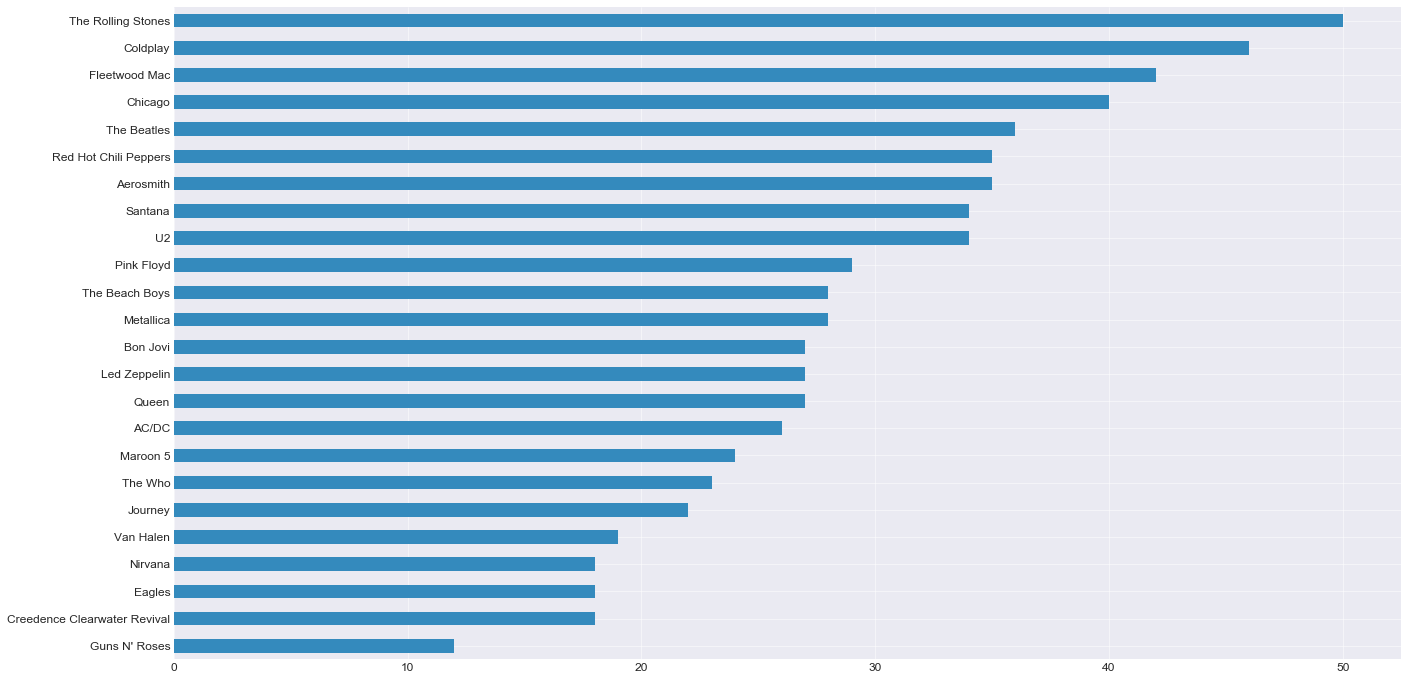

In [208]:
plt.figure(figsize=(22,12))
plt.rcParams.update({'font.size': 12})
bands_df['artistName'].value_counts().sort_values(ascending=True).plot(kind='barh')

**¿What are most, explicit or not Explicit albums?**

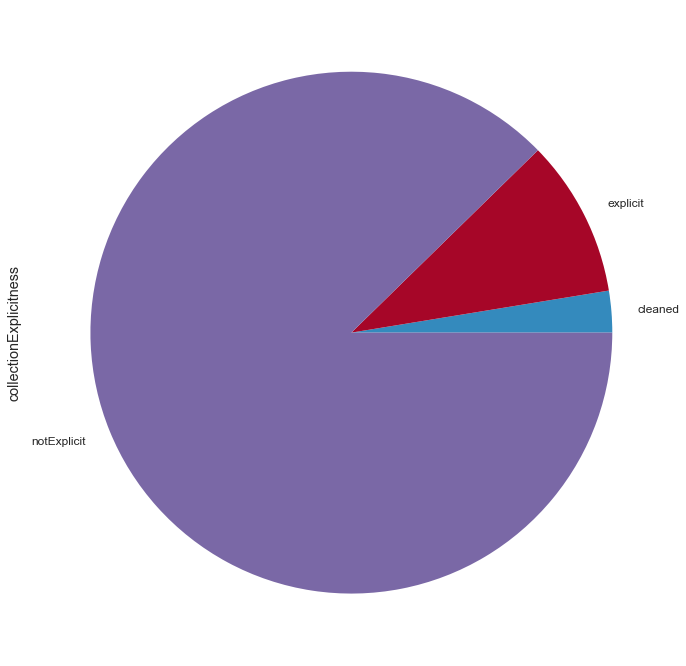

In [218]:
plt.figure(figsize=(22,12))
bands_df['collectionExplicitness'].value_counts().sort_values(ascending=True).plot(kind='pie')

**¿What is the price distribution?**

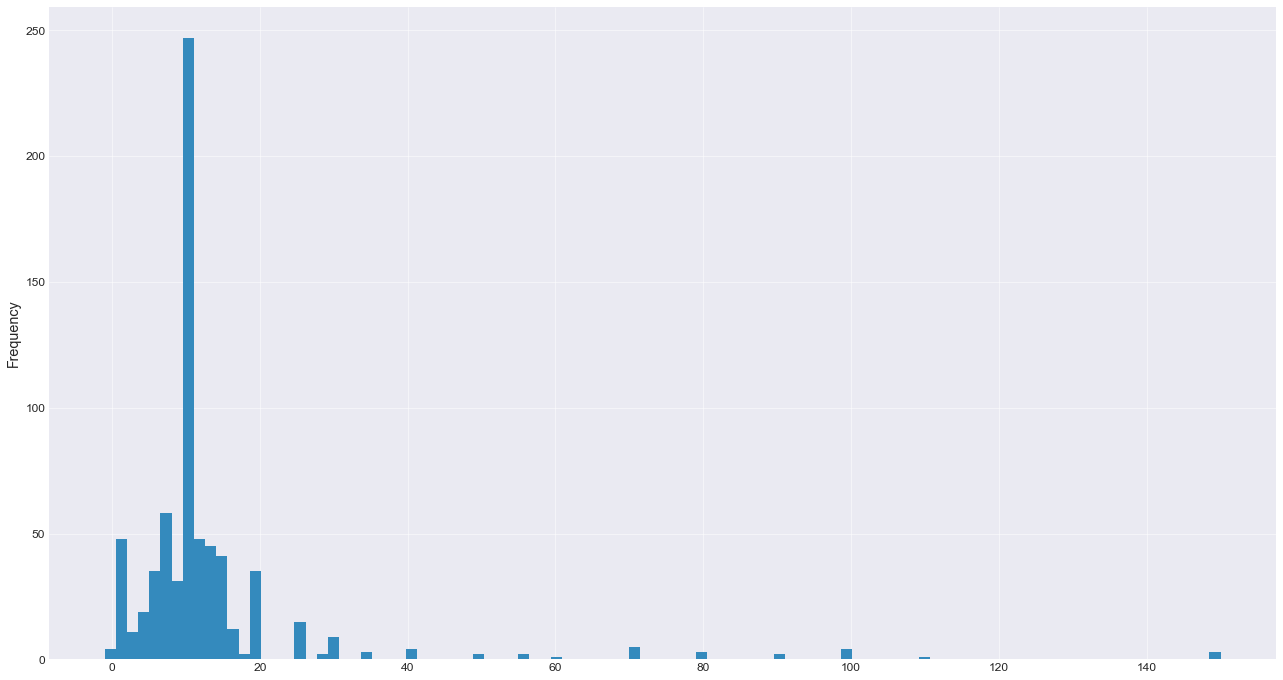

In [217]:
plt.figure(figsize=(22,12))
bands_df['collectionPrice'].plot(kind='hist', bins=100)

**¿Which is the dominant Genre?**

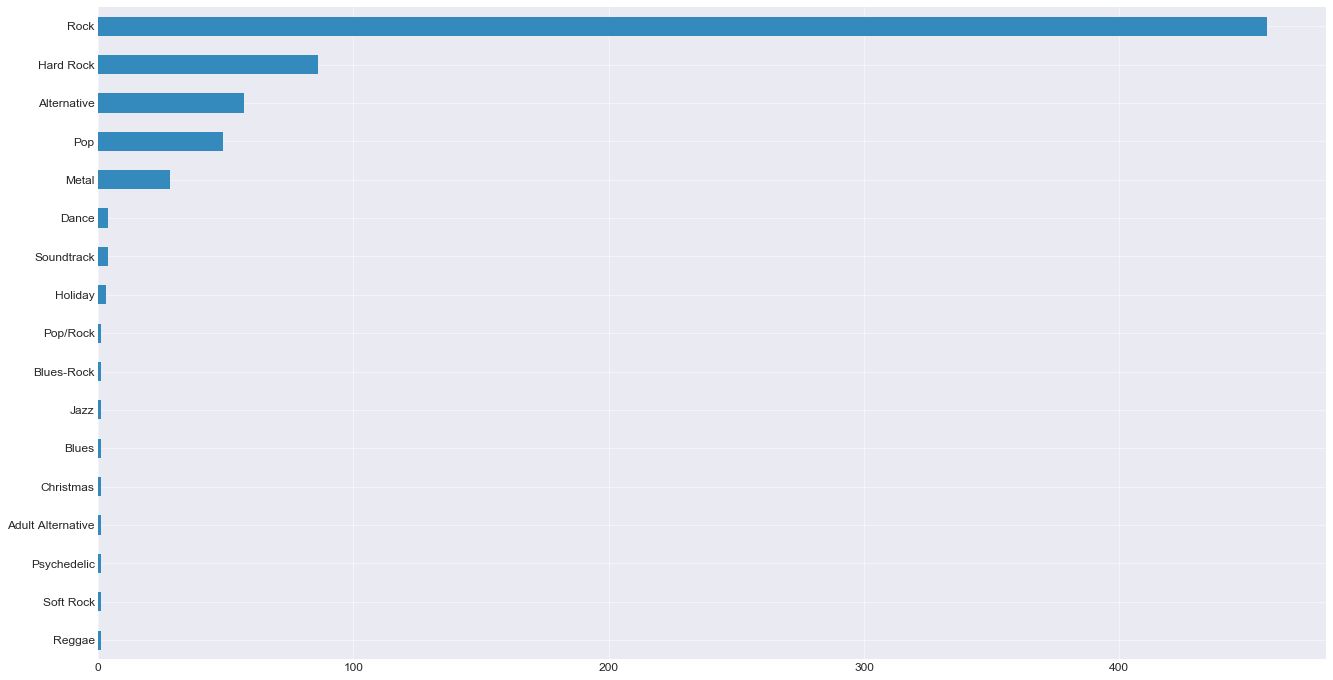

In [223]:
plt.figure(figsize=(22,12))
bands_df['primaryGenreName'].value_counts().sort_values(ascending=True).plot(kind='barh')

**¿What is the number of tracks distribution?**

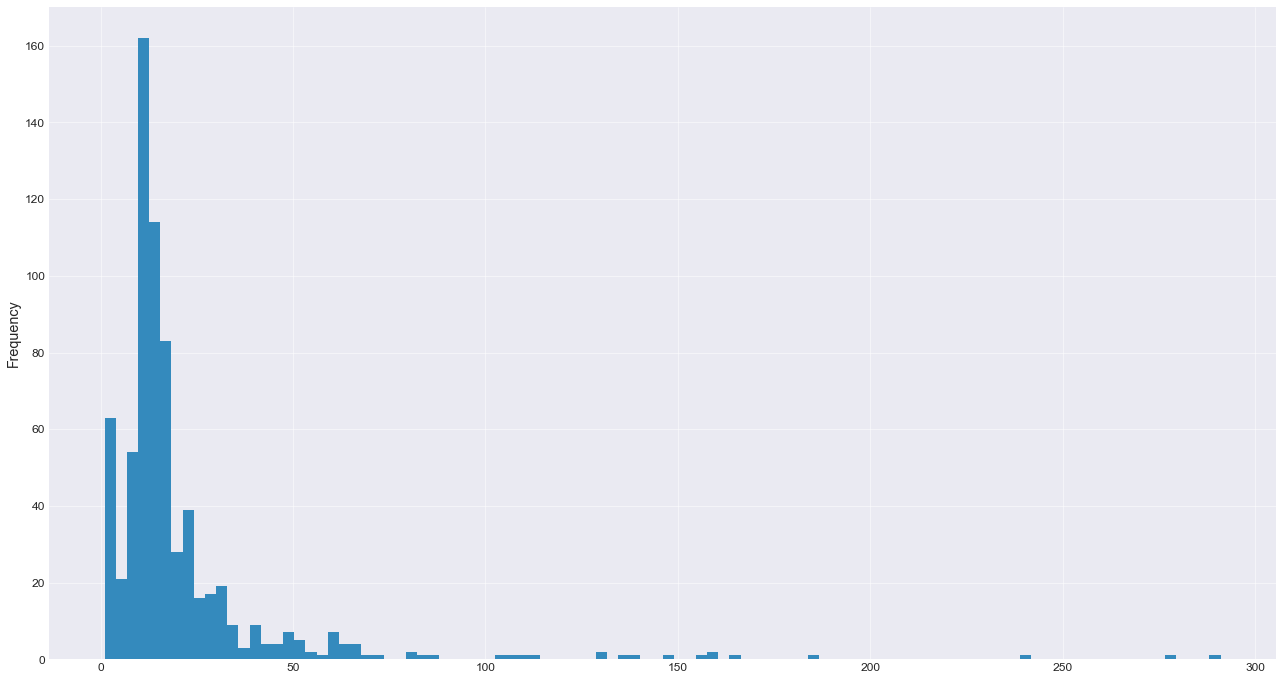

In [229]:
plt.figure(figsize=(22,12))
bands_df['trackCount'].plot(kind='hist', bins=100)

**¿Which is the estimated distribution of yearly releases?**

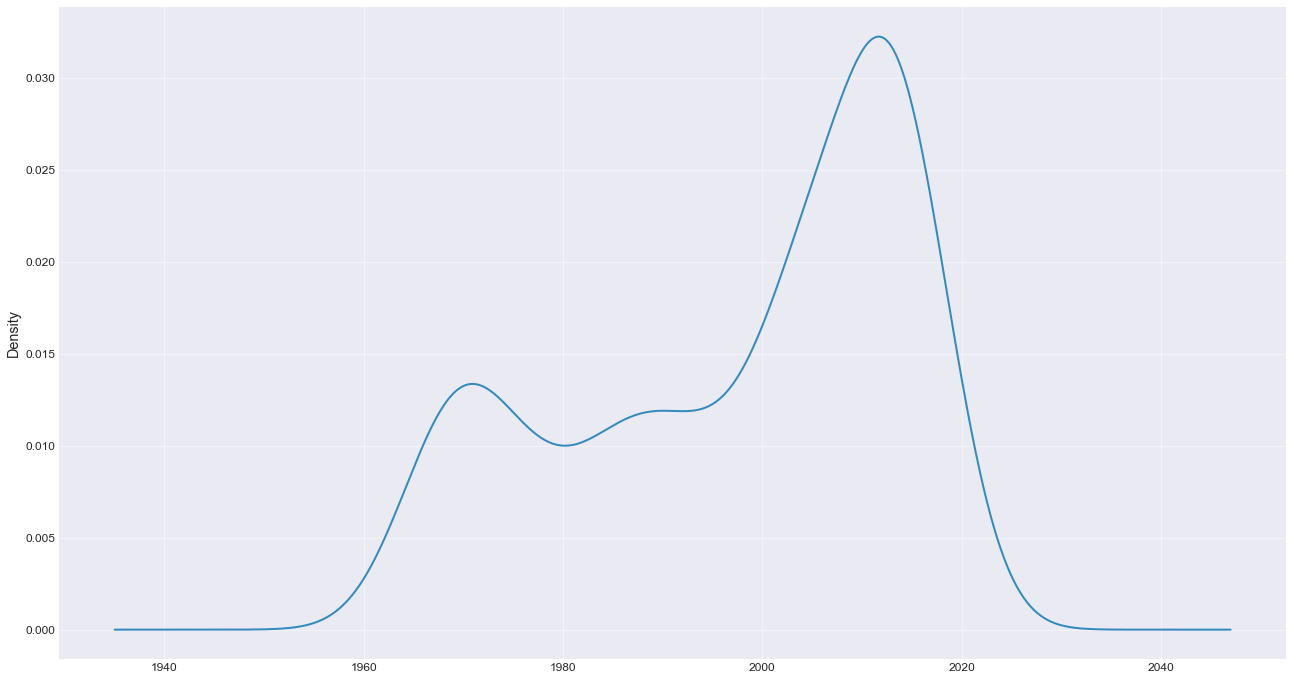

In [243]:
plt.figure(figsize=(22,12))
bands_df['releaseDate'].dt.year.plot(kind='kde')